<a href="https://colab.research.google.com/github/qurainisepty/portfolio/blob/main/Car_Sales_in_US.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


#Libraries untuk data visualization:
import seaborn as sns
import matplotlib as mpl
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import matplotlib
%matplotlib inline
color = sn.color_palette()
import matplotlib.ticker as mtick
from IPython.display import display
pd.options.display.max_columns = None
from pandas.plotting import scatter_matrix
from sklearn.metrics import roc_curve


In [ ]:
df = pd.read_csv('Car Sales.xlsx - car_data.csv')
df

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23901,C_CND_023902,12/31/2023,Martin,Male,13500,C & M Motors Inc,Plymouth,Voyager,Overhead Camshaft,Manual,Red,12000,60504-7114,Passenger,8583598,Pasco
23902,C_CND_023903,12/31/2023,Jimmy,Female,900000,Ryder Truck Rental and Leasing,Chevrolet,Prizm,DoubleÂ Overhead Camshaft,Auto,Black,16000,06457-3834,Hardtop,7914229,Middletown
23903,C_CND_023904,12/31/2023,Emma,Male,705000,Chrysler of Tri-Cities,BMW,328i,Overhead Camshaft,Manual,Red,21000,99301-3882,Sedan,7659127,Scottsdale
23904,C_CND_023905,12/31/2023,Victoire,Male,13500,Chrysler Plymouth,Chevrolet,Metro,DoubleÂ Overhead Camshaft,Auto,Black,31000,53546-9427,Passenger,6030764,Austin


# **EXPLORATORY DATA ANALYSIS (EDA)**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23906 entries, 0 to 23905
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Car_id         23906 non-null  object
 1   Date           23906 non-null  object
 2   Customer Name  23905 non-null  object
 3   Gender         23906 non-null  object
 4   Annual Income  23906 non-null  int64 
 5   Dealer_Name    23906 non-null  object
 6   Company        23906 non-null  object
 7   Model          23906 non-null  object
 8   Engine         23906 non-null  object
 9   Transmission   23906 non-null  object
 10  Color          23906 non-null  object
 11  Price ($)      23906 non-null  int64 
 12  Dealer_No      23906 non-null  object
 13  Body Style     23906 non-null  object
 14  Phone          23906 non-null  int64 
 15  Dealer_Region  23906 non-null  object
dtypes: int64(3), object(13)
memory usage: 2.9+ MB


In [ ]:
df.nunique()

,0
Car_id,23906
Date,612
Customer Name,3021
Gender,2
Annual Income,2508
Dealer_Name,28
Company,30
Model,154
Engine,2
Transmission,2


In [ ]:
df.describe()

,Annual Income,Price ($),Phone
count,2.390600e+04,23906.000000,2.390600e+04
mean,8.308403e+05,28090.247846,7.497741e+06
std,7.200064e+05,14788.687608,8.674920e+05
min,1.008000e+04,1200.000000,6.000101e+06
25%,3.860000e+05,18001.000000,6.746495e+06
50%,7.350000e+05,23000.000000,7.496198e+06
75%,1.175750e+06,34000.000000,8.248146e+06
max,1.120000e+07,85800.000000,8.999579e+06


In [ ]:
#Hapus Variabel yang tidak perlu
df = df.drop(columns = ['Car_id','Customer Name', 'Gender','Phone','Dealer_No '])
df

,Date,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Body Style,Dealer_Region
0,1/2/2022,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,SUV,Middletown
1,1/2/2022,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,SUV,Aurora
2,1/2/2022,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,Passenger,Greenville
3,1/2/2022,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,SUV,Pasco
4,1/2/2022,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,Hatchback,Janesville
...,...,...,...,...,...,...,...,...,...,...,...
23901,12/31/2023,13500,C & M Motors Inc,Plymouth,Voyager,Overhead Camshaft,Manual,Red,12000,Passenger,Pasco
23902,12/31/2023,900000,Ryder Truck Rental and Leasing,Chevrolet,Prizm,DoubleÂ Overhead Camshaft,Auto,Black,16000,Hardtop,Middletown
23903,12/31/2023,705000,Chrysler of Tri-Cities,BMW,328i,Overhead Camshaft,Manual,Red,21000,Sedan,Scottsdale
23904,12/31/2023,13500,Chrysler Plymouth,Chevrolet,Metro,DoubleÂ Overhead Camshaft,Auto,Black,31000,Passenger,Austin


In [ ]:
#Cek missing value
df.isna().sum()

,0
Date,0
Annual Income,0
Dealer_Name,0
Company,0
Model,0
Engine,0
Transmission,0
Color,0
Price ($),0
Body Style,0


In [ ]:
#Modifikasi tipe data menjadi kategorik
df.Dealer_Name = df.Dealer_Name.astype('category')
df.Company = df.Company.astype('category')
df.Model = df.Model.astype('category')
df.Engine = df.Engine.astype('category')
df.Transmission = df.Transmission.astype('category')
df.Color = df.Color.astype('category')
df['Body Style'] = df['Body Style'].astype('category')
df.Dealer_Region = df.Dealer_Region.astype('category')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23906 entries, 0 to 23905
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Date           23906 non-null  object  
 1   Annual Income  23906 non-null  int64   
 2   Dealer_Name    23906 non-null  category
 3   Company        23906 non-null  category
 4   Model          23906 non-null  category
 5   Engine         23906 non-null  category
 6   Transmission   23906 non-null  category
 7   Color          23906 non-null  category
 8   Price ($)      23906 non-null  int64   
 9   Body Style     23906 non-null  category
 10  Dealer_Region  23906 non-null  category
dtypes: category(8), int64(2), object(1)
memory usage: 779.3+ KB


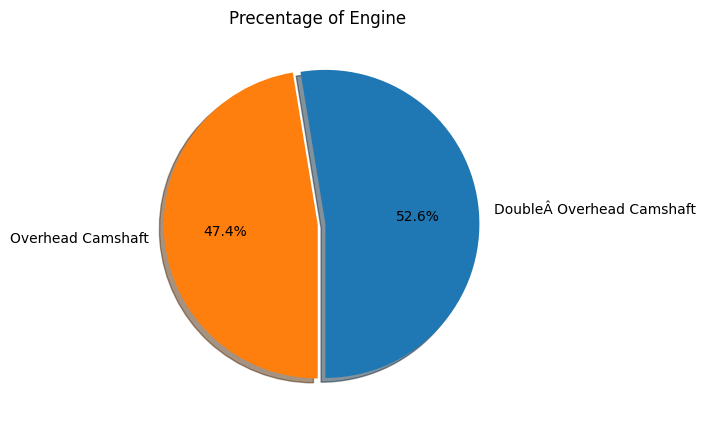

In [ ]:
#Pie Chart Engine
sizes = df['Engine'].value_counts(sort = True)
mpl.rcParams['figure.figsize'] = 5,5
explode = (0.05, 0)
labels = sizes.index
plt.pie(sizes, explode = explode, labels = labels,
                        autopct = '%1.1f%%', shadow = True, startangle = 270)
plt.title("Precentage of Engine")
plt.show()

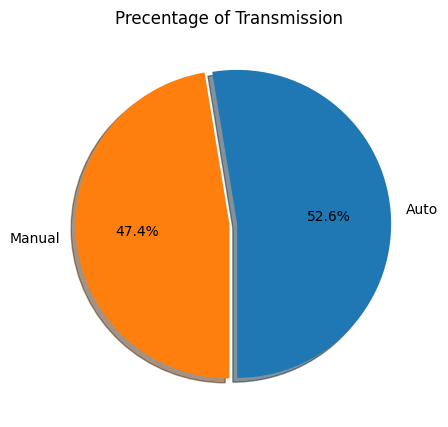

In [ ]:
#Pie Chart untuk transmisi mobil
sizes = df['Transmission'].value_counts(sort = True)
mpl.rcParams['figure.figsize'] = 5,5
explode = (0.05, 0)
labels = sizes.index
plt.pie(sizes, explode = explode, labels = labels,
                        autopct = '%1.1f%%', shadow = True, startangle = 270)
plt.title("Precentage of Transmission")
plt.show()

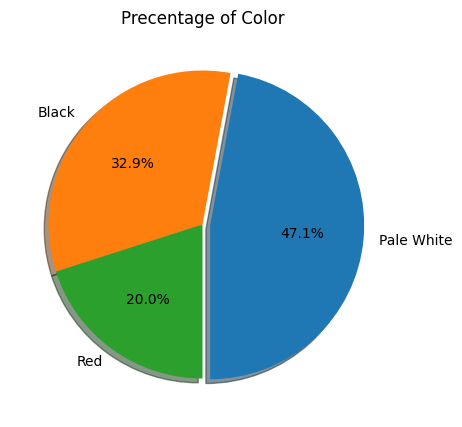

In [ ]:
#Pie Chart untuk Warna mobil
sizes = df['Color'].value_counts(sort = True)
mpl.rcParams['figure.figsize'] = 5,5
explode = (0.05, 0, 0)
labels = sizes.index
plt.pie(sizes, explode = explode, labels = labels,
                        autopct = '%1.1f%%', shadow = True, startangle = 270)
plt.title("Precentage of Color")
plt.show()

In [ ]:
#Total Penjualan tiap Company
company_count=df['Company'].value_counts()
company_count

,count
Company,
Chevrolet,1819
Dodge,1671
Ford,1614
Volkswagen,1333
Mercedes-B,1285
Mitsubishi,1277
Chrysler,1120
Oldsmobile,1111
Toyota,1110


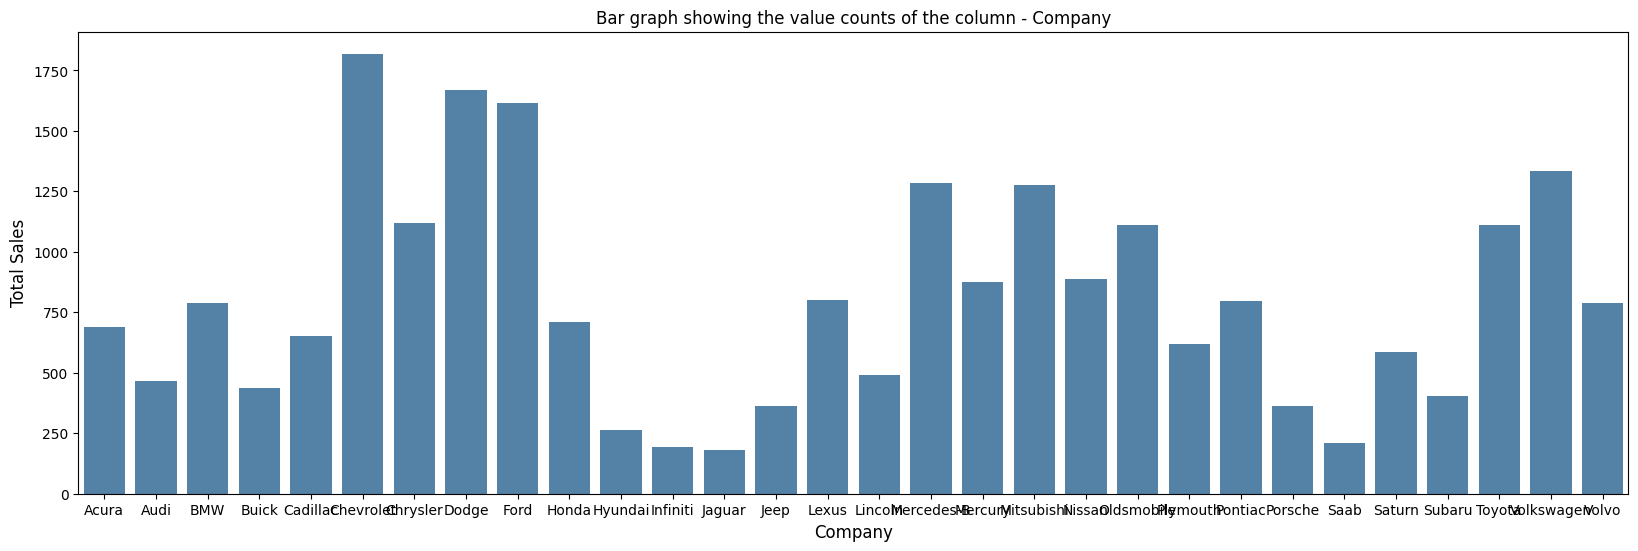

In [ ]:
#Bar Chart untuk Total Penjualan Mobil Tiap Company
plt.figure(figsize = (20, 6))
sns.barplot(x=company_count.index, y=company_count.values, color='steelblue')
plt.title('Bar graph showing the value counts of the column - Company')
plt.ylabel('Total Sales', fontsize = 12)
plt.xlabel('Company', fontsize = 12)
plt.show()

Berdasarkan tabel dan grafik di atas, Perusahaan Chevrolet memimpin penjualan mobil di United States pada periode 2022-2023

In [ ]:
#Total Penjualan Mobil Per Region
df['Dealer_Region'].value_counts()

,count
Dealer_Region,
Austin,4135
Janesville,3821
Scottsdale,3433
Pasco,3131
Aurora,3130
Greenville,3128
Middletown,3128


Dealer di wilayah Austin mampu menjual mobil sebanyak 4135 unit pada periode waktu 2 Januari 2022 hingga 31 Desember 2024, Dimana wilayah ini merupakan wilayah dengan total penjualan mobil terbanyak dibandingkan dengan 6 wilayah lain yang ada di United States

In [ ]:
#Total Penjualan Mobil Berdasarkan Model
df['Model'].value_counts()

,count
Model,
Diamante,418
Silhouette,411
Prizm,411
Passat,391
Ram Pickup,383
...,...
Mirage,19
Alero,18
Avalon,15


Model Diamante merupakan model mobil yang paling banyak terjual di United States dan model Serbing Conv. merupakan model yang kurang diminati oleh konsumen di United States.

In [107]:
df[(df['Model'] == 'Diamante')]

,Date,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Body Style,Dealer_Region
5,1/2/2022,850000,Classic Chevy,Mitsubishi,Diamante,Overhead Camshaft,Manual,Pale White,12000,Hatchback,Scottsdale
69,1/4/2022,13500,Clay Johnson Auto Sales,Mitsubishi,Diamante,DoubleÂ Overhead Camshaft,Auto,Pale White,21000,Hatchback,Pasco
116,1/9/2022,700000,Motor Vehicle Branch Office,Mitsubishi,Diamante,Overhead Camshaft,Manual,Black,49000,Hatchback,Austin
158,1/12/2022,2750000,Pars Auto Sales,Mitsubishi,Diamante,DoubleÂ Overhead Camshaft,Auto,Black,18000,Hatchback,Greenville
185,1/17/2022,890000,Gartner Buick Hyundai Saab,Mitsubishi,Diamante,Overhead Camshaft,Manual,Pale White,19000,Hatchback,Greenville
...,...,...,...,...,...,...,...,...,...,...,...
23555,12/25/2023,13500,Ryder Truck Rental and Leasing,Mitsubishi,Diamante,Overhead Camshaft,Manual,Black,22000,Hatchback,Middletown
23647,12/27/2023,344700,Scrivener Performance Engineering,Mitsubishi,Diamante,DoubleÂ Overhead Camshaft,Auto,Pale White,21700,Hatchback,Greenville
23682,12/29/2023,390000,Capitol KIA,Mitsubishi,Diamante,DoubleÂ Overhead Camshaft,Auto,Black,18000,Hatchback,Greenville
23810,12/29/2023,1615000,Buddy Storbeck's Diesel Service Inc,Mitsubishi,Diamante,DoubleÂ Overhead Camshaft,Auto,Black,17500,Hatchback,Greenville


In [108]:
Diamante = df[(df['Model'] == 'Diamante')]
Diamante['Company'].value_counts()

,count
Company,
Mitsubishi,418
Acura,0
Audi,0
Volkswagen,0
Toyota,0
Subaru,0
Saturn,0
Saab,0
Porsche,0


In [ ]:
#Rata-rata harga mobil di setiap company
mean_price_company = df[['Company', 'Price ($)']].groupby('Company', as_index = False)['Price ($)'].mean().sort_values('Price ($)', ascending=True)
mean_price_company

<ipython-input-52-c23f4af19752>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_price_company = df[['Company', 'Price ($)']].groupby('Company', as_index = False)['Price ($)'].mean().sort_values('Price ($)', ascending=True)


,Company,Price ($)
10,Hyundai,19386.234848
13,Jeep,21057.338843
23,Porsche,22674.894737
1,Audi,22851.790598
0,Acura,24758.561684
2,BMW,25090.622785
12,Jaguar,25138.194444
28,Volkswagen,25568.552888
6,Chrysler,26019.529464
5,Chevrolet,26198.606377


Perusahaan mobil yang memiliki rata-rata harga mobil yang diproduksi paling tinggi di United States adalah Company Candillac

In [ ]:
#Pembelian mobil berdasarkan rata rata income
df[['Company', 'Annual Income']].groupby('Company', as_index = False)['Annual Income'].mean().sort_values('Annual Income', ascending=True)

<ipython-input-73-2c6476c6c80c>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df[['Company', 'Annual Income']].groupby('Company', as_index = False)['Annual Income'].mean().sort_values('Annual Income', ascending=True)


,Company,Annual Income
12,Jaguar,732528.544444
14,Lexus,776040.334165
9,Honda,778164.860169
22,Pontiac,790448.979899
15,Lincoln,794274.695122
26,Subaru,795085.550617
5,Chevrolet,799263.693238
0,Acura,810430.190131
8,Ford,813954.126394
13,Jeep,814149.966942


<ipython-input-57-0bccb2c315c5>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[integer[i]], color='#4682b4')
<ipython-input-57-0bccb2c315c5>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[integer[i]], color='#4682b4')


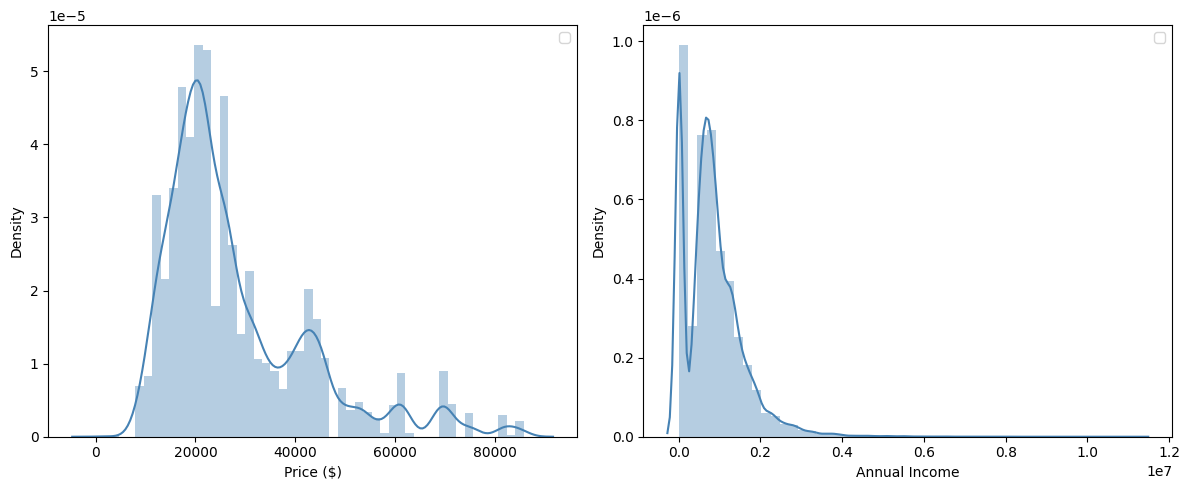

In [ ]:
#Distribusi dari Pendapatan Tahunan (Annual Income) dan Harga Mobil (Price ($))
integer = ['Price ($)', 'Annual Income']
plt.figure(figsize=(12,5))
for i in range(0, len(integer)):
    plt.subplot(1, len(integer), i+1)
    sns.distplot(df[integer[i]], color='#4682b4')
    plt.legend(loc = 'best')
    plt.tight_layout()

<ipython-input-56-a5255d7c1d20>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(price, label = 'Skewness: %.2f'%(price.skew()))


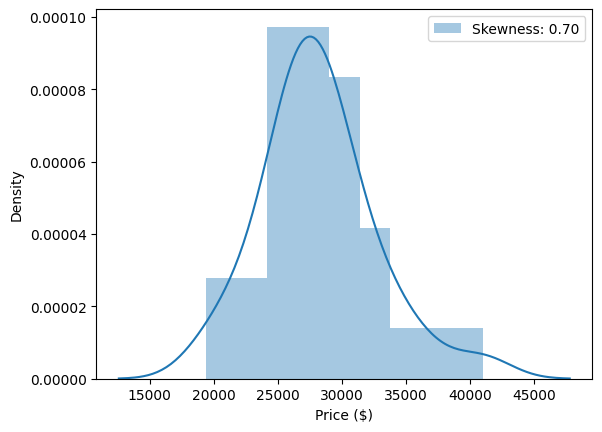

In [ ]:
#Distribusi dari rata-rata harga mobil per-Company
price = mean_price_company['Price ($)']
sns.distplot(price, label = 'Skewness: %.2f'%(price.skew()))
plt.legend(loc = 'best')

<ipython-input-74-d6640dd96f8f>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Annual Income'], label = 'Skewness: %.2f'%(df['Annual Income'].skew()))


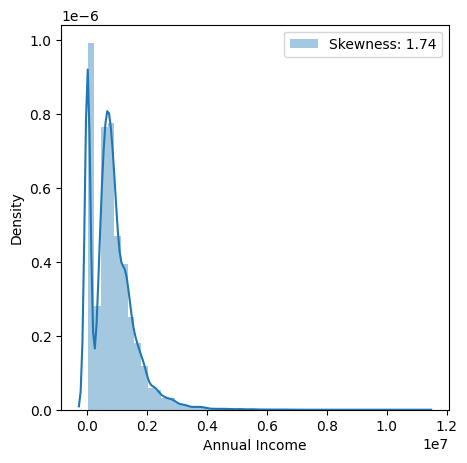

In [ ]:
sns.distplot(df['Annual Income'], label = 'Skewness: %.2f'%(df['Annual Income'].skew()))
plt.legend(loc = 'best')

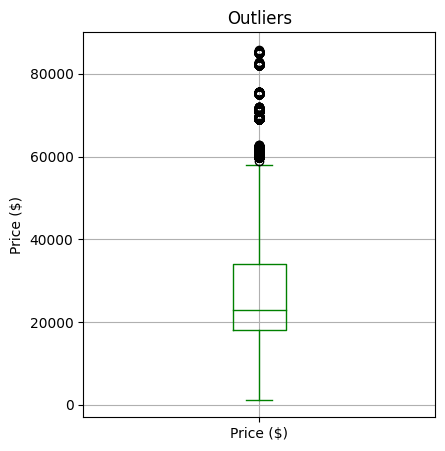

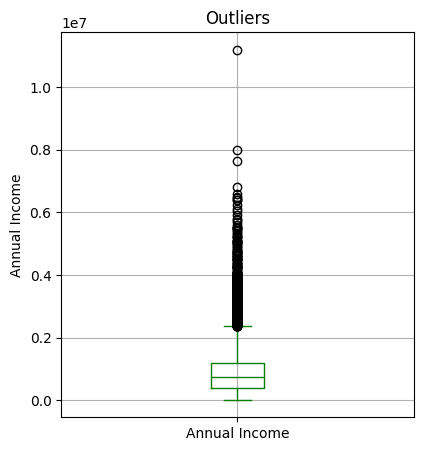

In [ ]:
for var in integer:
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    fig = df.boxplot(column=var, color = 'green')
    fig.set_title('Outliers')
    fig.set_ylabel(var)
    plt.show()

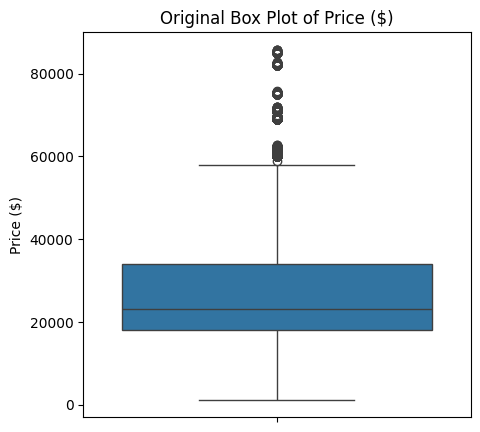

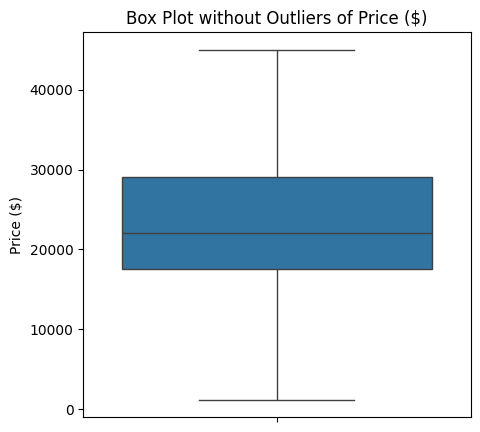

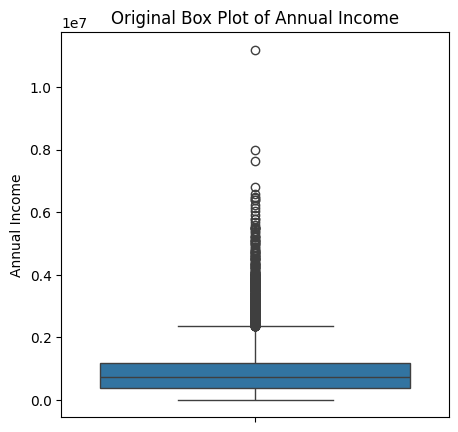

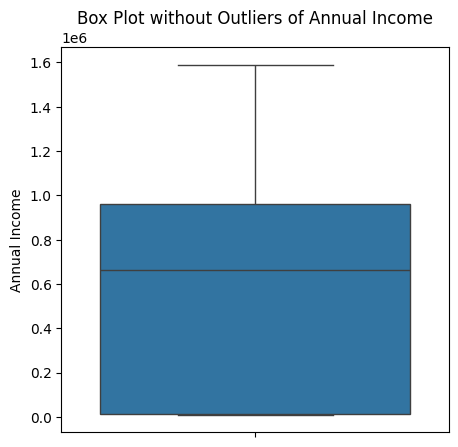

In [77]:
def removal_box_plot(df, column, threshold):
    sns.boxplot(df[column])
    plt.title(f'Original Box Plot of {column}')
    plt.show()

    # Apply threshold to each column separately
    removed_outliers = df[df[column] <= df[column].quantile(1-threshold)]

    sns.boxplot(removed_outliers[column])
    plt.title(f'Box Plot without Outliers of {column}')
    plt.show()
    return removed_outliers


threshold_value = 0.12

# Iterate over columns and apply the function
for col in ['Price ($)','Annual Income']:
    no_outliers = removal_box_plot(df.copy(), col, threshold_value)

In [81]:
no_outliers[['Company', 'Annual Income']].groupby('Company', as_index = False)['Annual Income'].mean().sort_values('Annual Income', ascending=True)

<ipython-input-81-bc1f2d687bb4>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  no_outliers[['Company', 'Annual Income']].groupby('Company', as_index = False)['Annual Income'].mean().sort_values('Annual Income', ascending=True)


,Company,Annual Income
10,Hyundai,602882.672727
23,Porsche,618109.477124
16,Mercedes-B,618337.484014
12,Jaguar,620527.772455
26,Subaru,623894.562674
6,Chrysler,625197.254882
22,Pontiac,625338.098453
5,Chevrolet,630214.727723
13,Jeep,630777.586420
14,Lexus,631083.393103


Mobil dari company Hyundai merupakan mobil yang paling banyak dibeli oleh konsumen yang memiliki income tahunan rata-rata $602882.672727 Konsumen dengan income tahunan tinggi lebih memilih mobil yang diproduksi oleh company Saab.

# **CHEVROLET**

In [101]:
#Dataset dari perusahaan Chevrolet
Chevrolet = df[(df['Company'] == 'Chevrolet')]
Chevrolet

,Date,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Body Style,Dealer_Region
8,1/2/2022,815000,Rabun Used Car Sales,Chevrolet,Malibu,Overhead Camshaft,Manual,Pale White,82000,Hardtop,Pasco
42,1/3/2022,967500,U-Haul CO,Chevrolet,Lumina,Overhead Camshaft,Manual,Black,42500,Passenger,Austin
53,1/3/2022,615000,Scrivener Performance Engineering,Chevrolet,Malibu,Overhead Camshaft,Manual,Pale White,14000,Hardtop,Middletown
83,1/5/2022,1100000,Pars Auto Sales,Chevrolet,Corvette,DoubleÂ Overhead Camshaft,Auto,Pale White,45000,SUV,Greenville
84,1/5/2022,13500,Pitre Buick-Pontiac-Gmc of Scottsdale,Chevrolet,Impala,Overhead Camshaft,Manual,Pale White,22001,Hatchback,Pasco
...,...,...,...,...,...,...,...,...,...,...,...
23863,12/30/2023,906000,Race Car Help,Chevrolet,Malibu,Overhead Camshaft,Manual,Pale White,14001,Hardtop,Austin
23882,12/31/2023,501000,Suburban Ford,Chevrolet,Prizm,Overhead Camshaft,Manual,Red,22001,Hatchback,Janesville
23891,12/31/2023,2340000,Ryder Truck Rental and Leasing,Chevrolet,Corvette,DoubleÂ Overhead Camshaft,Auto,Pale White,46000,SUV,Middletown
23902,12/31/2023,900000,Ryder Truck Rental and Leasing,Chevrolet,Prizm,DoubleÂ Overhead Camshaft,Auto,Black,16000,Hardtop,Middletown


In [103]:
#Total penjualan mobil Chevrolet berdasarkan modelnya
Chevrolet['Model'].value_counts()

,count
Model,
Prizm,411
Metro,258
Corvette,245
Malibu,237
Cavalier,170
...,...
ES300,0
Eclipse,0
Elantra,0


Model Prizm adalah model yang paling laris dari model mobil yang diproduksi oleh perusahaan Chevrolet.

In [104]:
#Model mobil chevrolet berdasarkan rata rata Annual income
income = Chevrolet[['Model', 'Annual Income']].groupby('Model', as_index = False)['Annual Income'].mean().sort_values('Annual Income', ascending=True)
income

<ipython-input-104-f9901e491fc3>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  income = Chevrolet[['Model', 'Annual Income']].groupby('Model', as_index = False)['Annual Income'].mean().sort_values('Annual Income', ascending=True)


,Model,Annual Income
89,Lumina,696066.049383
35,Cavalier,761715.588235
93,Metro,777598.837209
95,Monte Carlo,795542.517007
29,Camaro,801893.190909
...,...,...
149,Viper,NaN
150,Voyager,NaN
151,Windstar,NaN
152,Wrangler,NaN


In [105]:
#Rata-rata harga mobil per model dari perusahaan Chevrolet
price = Chevrolet[['Model', 'Price ($)']].groupby('Model', as_index = False)['Price ($)'].mean().sort_values('Price ($)', ascending=True)
price

<ipython-input-105-41e7896a0503>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  price = Chevrolet[['Model', 'Price ($)']].groupby('Model', as_index = False)['Price ($)'].mean().sort_values('Price ($)', ascending=True)


,Model,Price ($)
77,Impala,19143.936709
35,Cavalier,20221.923529
93,Metro,20720.763566
109,Prizm,22838.457421
89,Lumina,25079.691358
...,...,...
149,Viper,NaN
150,Voyager,NaN
151,Windstar,NaN
152,Wrangler,NaN


Model Impala adalah model mobil yang diproduksi oleh chevrolet dengan rata-rata harga mobil paling murah diantara model lain yang diproduksi oleh Chevrolet.

# **KESIMPULAN**

*   52.6% konsumen lebih memilih mobil dengan tipe engine DoubleA Overhead Camshaft dan transmisi automatic
*   Warna mobil yang paling disukai konsumen adalah warna white pale
*   Mobil yang paling laris dipasaran adalah mobil yang diproduksi oleh perusahaan Chevrolet
*   Wilayah Austin merupakan wilayah dengan penjualan mobil tertinggi, sedangkan wilayah Middletown merupakan wilayah dengan penjualan mobil terendah
*   Model Diamante yang diproduksi oleh perusahaan Mitshubisi adalah model yang paling laris
*   Mobil dengan rata-rata harga mobil yang paling rendah adalah mobil dari perusahaan Hyundai, sedangkan yang paling tinggi adalah dari Cadillac
*   Diperusahaan Chevrolet, model Prizm adalah yang paling banyak terjual
*   Pada perusahaan Chevrolet, konsumen dengan Annual income rendah rata-rata memilih mobil Chevrolet model Lumina, Sedangkan konsumen dengan annual income tinggi lebih memilih model Impala







